In [88]:
import numpy as np
import matplotlib.pyplot as plt
from denoise import denoise
from denoise import isingdenoise
import matplotlib.cm as cm

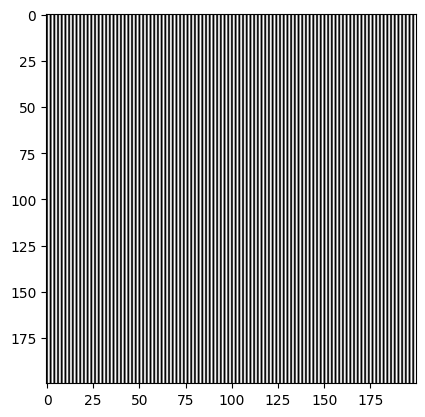

In [1]:
# create a 200x200 array of zeros
image = np.zeros((200, 200))

# set every other column to 1
image[:, 1::2] = 1

# display the image
plt.imshow(image, cmap="gray")

In [28]:
# create a function that generate black and white image of vertical zebra stripes of width n width of white, k width of black stripe and image has size of 200x200
def zebra(n, k):
    image = np.zeros((200, 200))
    for i in range(0, 200, n + k):
        image[:, i : i + n] = 1
    image = image * 2 - 1
    return image

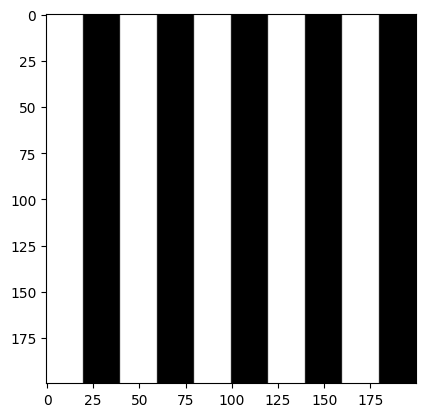

In [29]:
img = zebra(20, 20)
plt.imshow(img, cmap="gray")

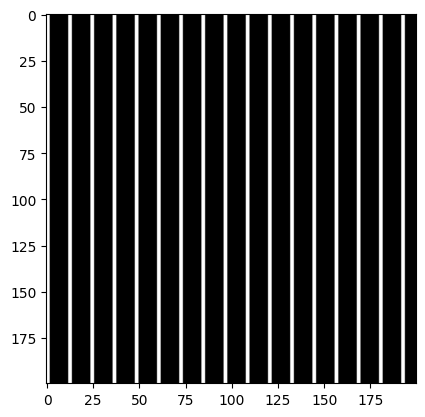

In [30]:
img = zebra(2, 10)
plt.imshow(img, cmap="gray")

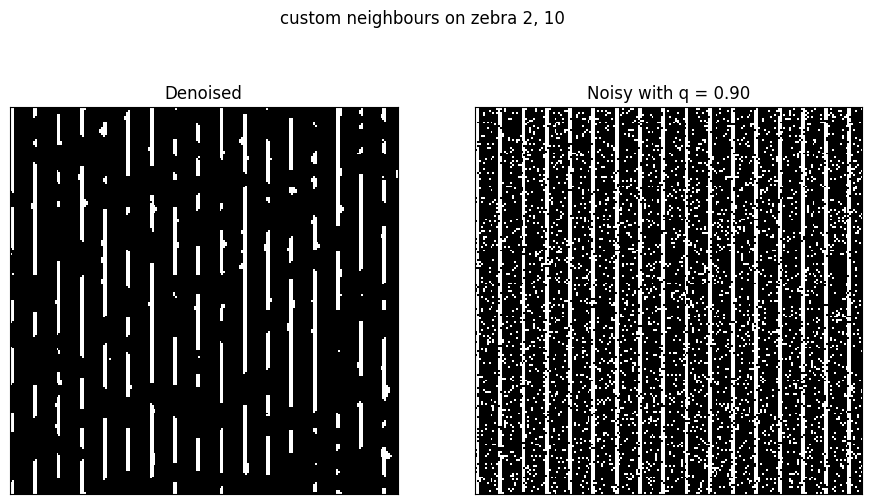

In [33]:
denoise(
    img,
    noise_strength=0.9,
    extfield_strength=0.9,
    burnin=50000,
    loops=500000,
    use_default_neighbours=False,
    fig_title="custom neighbours on zebra 2, 10",
)

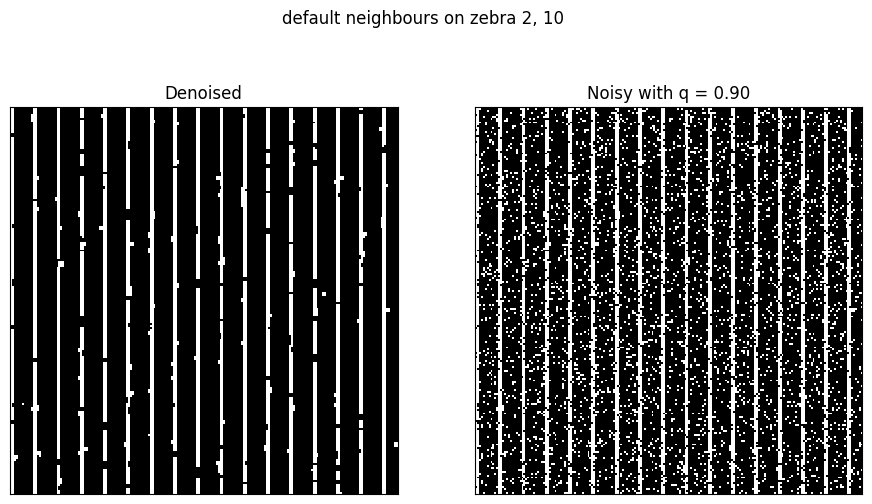

In [34]:
denoise(
    img,
    noise_strength=0.9,
    extfield_strength=0.9,
    burnin=50000,
    loops=500000,
    use_default_neighbours=True,
    fig_title="default neighbours on zebra 2, 10",
)

In [35]:
img = zebra(10, 2)

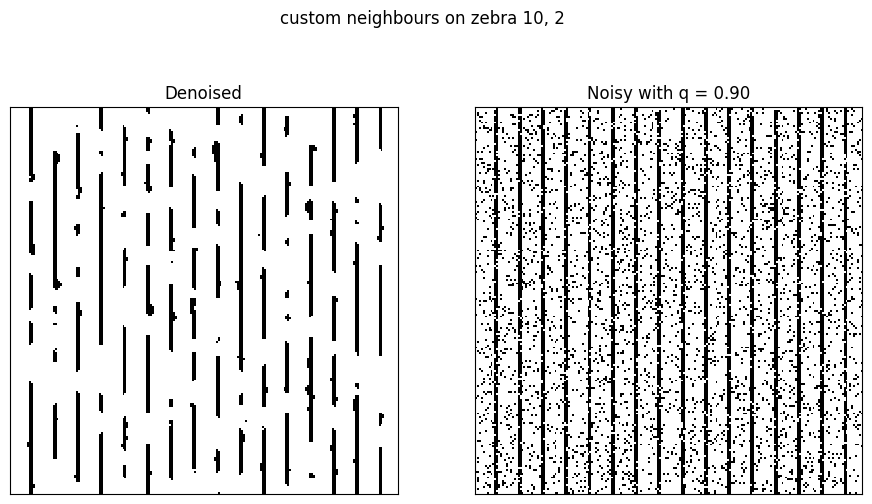

In [36]:
denoise(
    img,
    noise_strength=0.9,
    extfield_strength=0.9,
    burnin=50000,
    loops=500000,
    use_default_neighbours=False,
    fig_title="custom neighbours on zebra 10, 2",
)

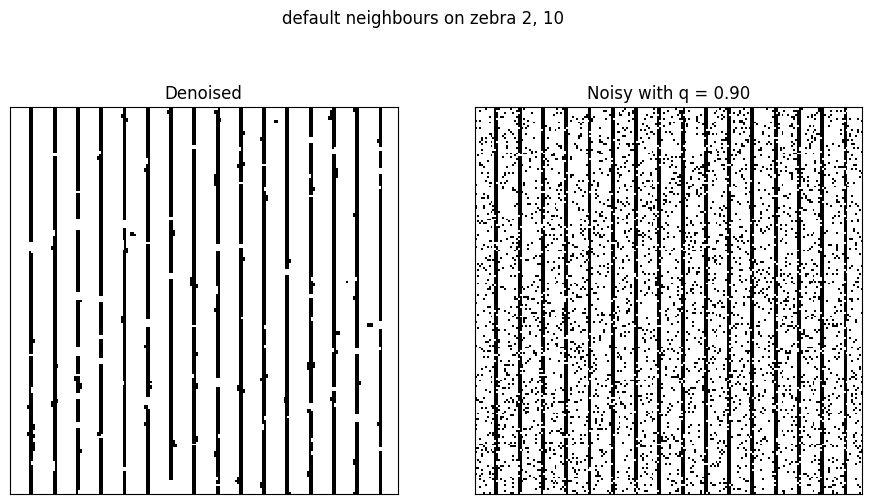

In [37]:
denoise(
    img,
    noise_strength=0.9,
    extfield_strength=0.9,
    burnin=50000,
    loops=500000,
    use_default_neighbours=True,
    fig_title="default neighbours on zebra 2, 10",
)

In [38]:
img = zebra(100, 100)

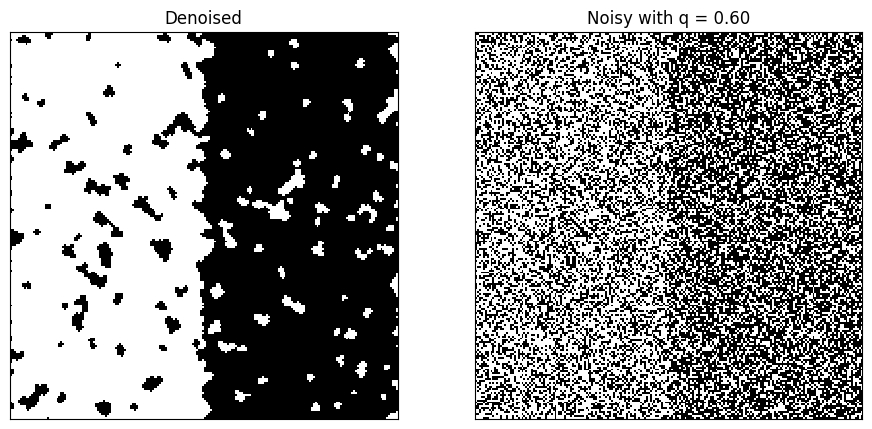

In [52]:
denoise(
    img,
    noise_strength=0.6,
    extfield_strength=0.99,
    burnin=50000,
    loops=5000000,
    use_default_neighbours=False,
)

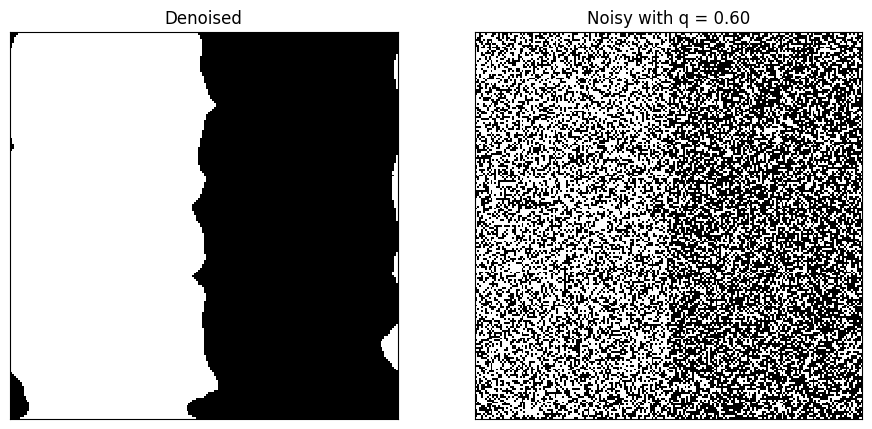

In [53]:
denoise(
    img,
    noise_strength=0.6,
    extfield_strength=0.6,
    burnin=50000,
    loops=5000000,
    use_default_neighbours=False,
)

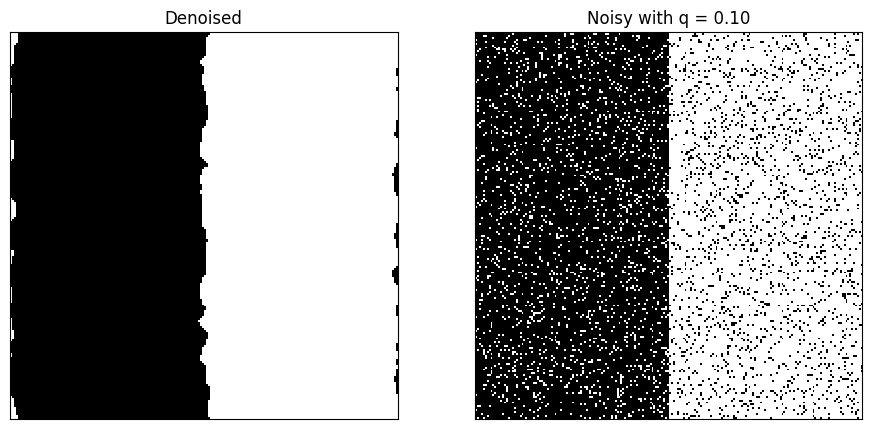

In [74]:
denoise(
    img,
    noise_strength=0.1,
    extfield_strength=0.1,
    burnin=500000,
    loops=50000,
    use_default_neighbours=False,
)

In [95]:
def visualize_ext_and_noise(
    image_source: str,
    noise_strength: float = [0.01, 0.1, 0.25, 0.45],
    extfield_strength: float = 0.9,
    burnin: int = 50000,
    loops: int = 50000,
    invtemp: float = 2.0,
    use_default_neighbours: bool = True,
    fig_title: str = "",
):
    if isinstance(image_source, str):
        image = skimage.io.imread(image_source)
        image = (image[:, :, 0].astype(np.int32) * 2) - 1
    else:
        image = image_source
    noise = [
        np.random.random(size=image.size).reshape(image.shape) > strength
        for strength in noise_strength
    ]
    noisy = [np.array(image) for _ in noise]
    for i in range(len(noise)):
        noisy[i][noise[i]] = -noisy[i][noise[i]]
    avg = [
        isingdenoise(
            noisy[i], extfield_strength, burnin, loops, invtemp, use_default_neighbours
        )
        for i in range(len(noise))
    ]
    for i in range(len(noise)):
        avg[i][avg[i] >= 0] = 1
        avg[i][avg[i] < 0] = -1
        avg[i] = avg[i].astype(np.int32)
    fig, axes = plt.subplots(ncols=len(noise), figsize=(11, 6), nrows=2)

    for i in range(len(noise)):
        axes[1][i].imshow(
            avg[i], cmap=cm.gray, aspect="equal", interpolation="none", vmin=-1, vmax=1
        )
        # axes[i].set_title("Denoised with noise strength {:.2f}".format(noise_strength[i]))
    for i in range(len(noise)):
        axes[0][i].imshow(
            noisy[i],
            cmap=cm.gray,
            aspect="equal",
            interpolation="none",
            vmin=-1,
            vmax=1,
        )
        axes[0][i].set_title(f"Noise: q = {(noise_strength[i])}")
    for row in axes:
        for ax in row:
            # remove the y-axis
            ax.yaxis.set_visible(False)
            ax.xaxis.set_visible(False)

    fig.suptitle(fig_title)

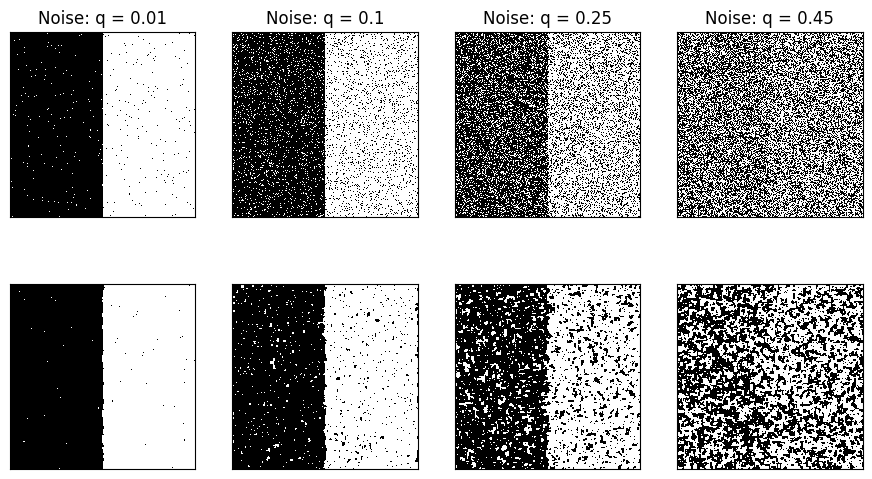

In [97]:
visualize_ext_and_noise(img, extfield_strength=0.1)